In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Import CSV using first column (date time) as DatetimeIndex
https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [2]:
df = pd.read_csv('/Users/AbiRumse/Documents/Code/data-projects/town-air-quality/oxfordshire_air_quality_data-WD1_21-02-09_11-56.csv', 
                 header = [2], index_col=0, parse_dates=True)

In [3]:
df.rename(columns={'Unnamed: 0':'Date_Time','Value':'NO_Value', 'Unit':'NO_Unit', 'Period':'NO_Period', 'Value.1':'NO2_Value', 'Unit.1':'NO2_Unit', 'Period.1':'NO2_Period',
                  'Value.2':'NOXasNO2_Value', 'Unit.2':'NOXasNO2_Unit', 'Period.2':'NOXasNO2_Period'}, inplace=True)

In [4]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [5]:
df['WeekdayName'] = df.index.day_name()
df['Month'] = df.index.month_name()
df['Time'] = df.index.time

In [6]:
df.head(10)

,NO_Value,NO_Unit,NO_Period,NO2_Value,NO2_Unit,NO2_Period,NOXasNO2_Value,NOXasNO2_Unit,NOXasNO2_Period,WeekdayName,Month,Time
2020-02-10 12:00:00,13.015074,24.0,1.0,19.333677,24.0,1.0,39.289845,24.0,1.0,Monday,February,12:00:00
2020-02-10 13:00:00,9.158756,24.0,1.0,20.063701,24.0,1.0,34.106930,24.0,1.0,Monday,February,13:00:00
2020-02-10 14:00:00,8.899196,24.0,1.0,17.953825,24.0,1.0,31.599067,24.0,1.0,Monday,February,14:00:00
2020-02-10 15:00:00,16.241032,24.0,1.0,27.316700,24.0,1.0,52.219271,24.0,1.0,Monday,February,15:00:00
2020-02-10 16:00:00,14.349953,24.0,1.0,24.977669,24.0,1.0,46.980624,24.0,1.0,Monday,February,16:00:00
2020-02-10 17:00:00,22.841270,24.0,1.0,34.194213,24.0,1.0,69.217005,24.0,1.0,Monday,February,17:00:00
2020-02-10 18:00:00,30.702226,24.0,1.0,43.931454,24.0,1.0,91.007542,24.0,1.0,Monday,February,18:00:00
2020-02-10 19:00:00,39.935142,24.0,1.0,54.240105,24.0,1.0,115.473135,24.0,1.0,Monday,February,19:00:00
2020-02-10 20:00:00,45.793779,24.0,1.0,52.167542,24.0,1.0,122.383690,24.0,1.0,Monday,February,20:00:00
2020-02-10 21:00:00,20.653551,24.0,1.0,31.083956,24.0,1.0,62.752292,24.0,1.0,Monday,February,21:00:00


In [7]:
df['NO2_Value'].describe()

count    8471.000000
mean       24.068416
std        19.228324
min        -0.199864
25%         9.132188
50%        19.220602
75%        34.520625
max       188.740745
Name: NO2_Value, dtype: float64

### Interesting things to note:

- `min` is less than 0 - how many errors do we have like this?
- `max` is 188 - what does this mean?

In [8]:
df.dtypes

NO_Value           float64
NO_Unit            float64
NO_Period          float64
NO2_Value          float64
NO2_Unit           float64
NO2_Period         float64
NOXasNO2_Value     float64
NOXasNO2_Unit      float64
NOXasNO2_Period    float64
WeekdayName         object
Month               object
Time                object
dtype: object

<AxesSubplot: ylabel='Frequency'>

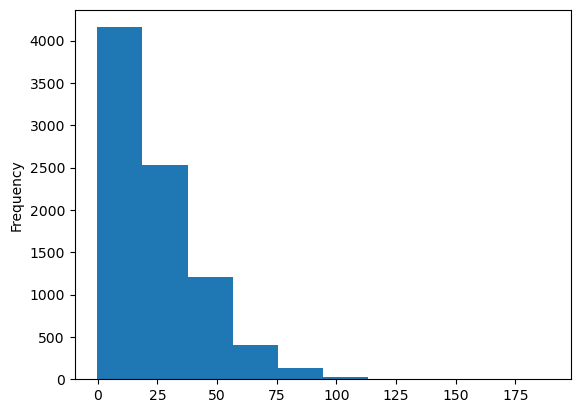

In [9]:
df['NO2_Value'].plot(kind='hist')

<AxesSubplot: >

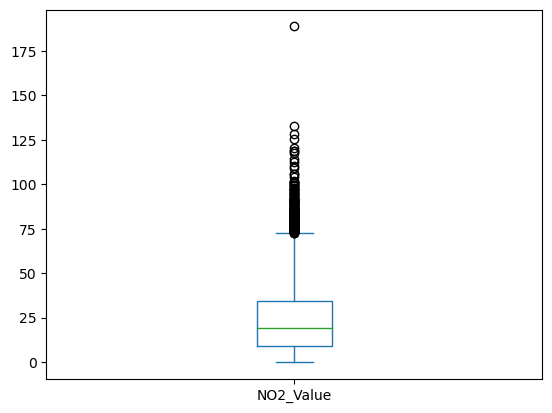

In [10]:
df['NO2_Value'].plot.box()

In [11]:
no2_classes = [{'index':1,'band':'low','range_bottom':0,'range_top':67},
                {'index':2,'band':'low','range_bottom':68,'range_top':134},
                {'index':3,'band':'low','range_bottom':135,'range_top':200},
                {'index':4,'band':'moderate','range_bottom':201,'range_top':267},
                {'index':5,'band':'moderate','range_bottom':268,'range_top':334},
                {'index':6,'band':'moderate','range_bottom':335,'range_top':400},
                {'index':7,'band':'high','range_bottom':401,'range_top':467},
                {'index':8,'band':'high','range_bottom':468,'range_top':534},
                {'index':9,'band':'high','range_bottom':535,'range_top':600},
                {'index':10,'band':'very high','range_bottom':601,'range_top':1000}]

In [12]:
# https://stackoverflow.com/questions/36421849/classify-data-by-value-in-pandas

df_classes = pd.DataFrame(no2_classes)
bins = list(df_classes['range_top'])
bins.insert(0,0)
labels = list(df_classes['index'])
df['NO2_Index'] = pd.cut(df['NO2_Value'], bins=bins, labels=labels)

In [13]:
df_classes

,index,band,range_bottom,range_top
0,1,low,0,67
1,2,low,68,134
2,3,low,135,200
3,4,moderate,201,267
4,5,moderate,268,334
5,6,moderate,335,400
6,7,high,401,467
7,8,high,468,534
8,9,high,535,600
9,10,very high,601,1000


This means that the highest NO2 value of 188 was still in the 'low' band

<AxesSubplot: >

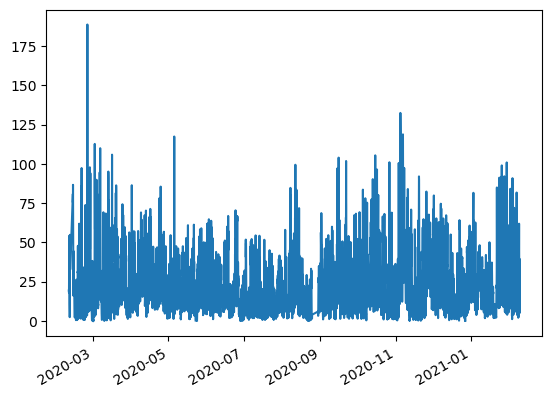

In [14]:
df['NO2_Value'].plot()

It looks like there was one day where NO2 was anywhere near 188

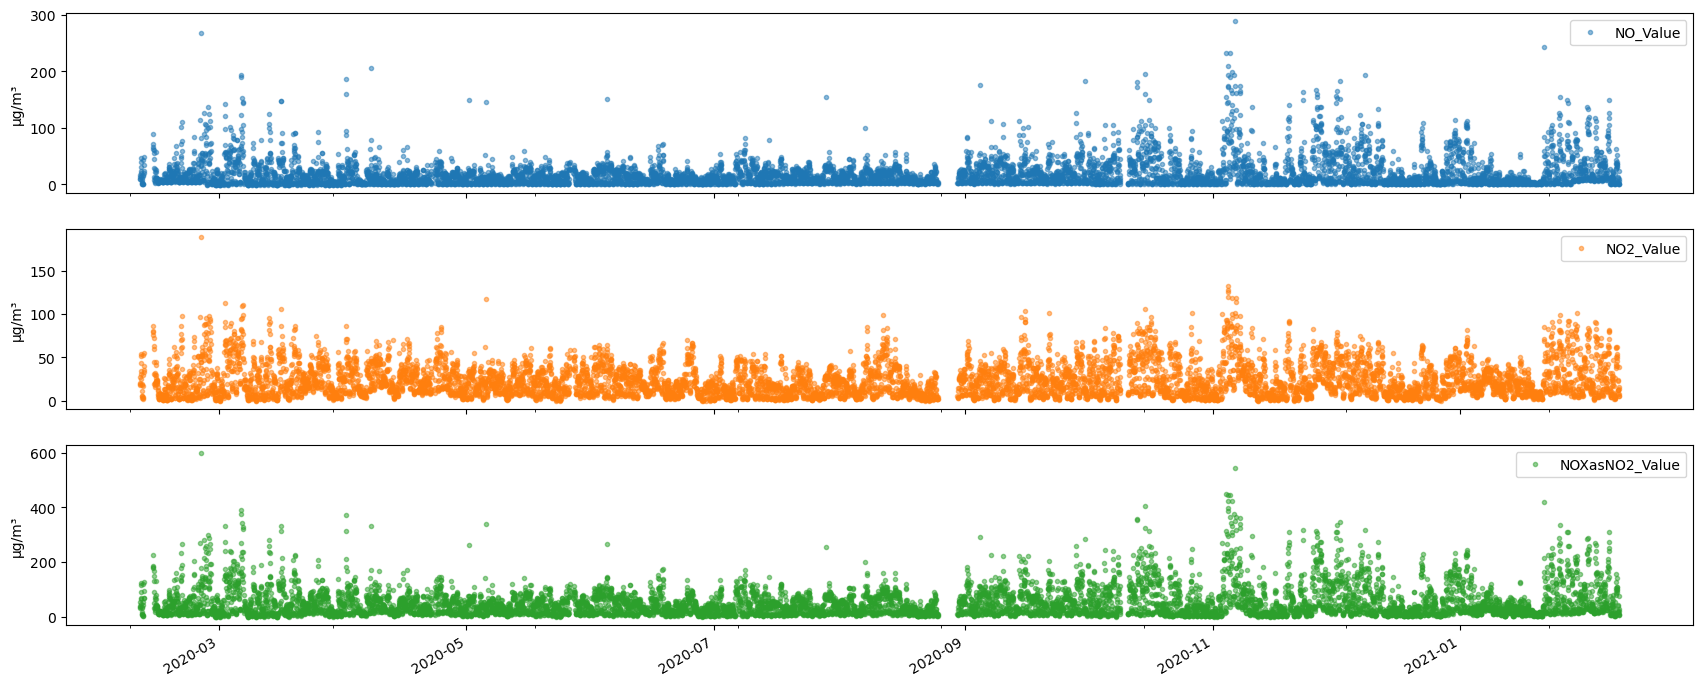

In [15]:
cols_plot = ['NO_Value', 'NO2_Value', 'NOXasNO2_Value']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(21, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('µg/m³')

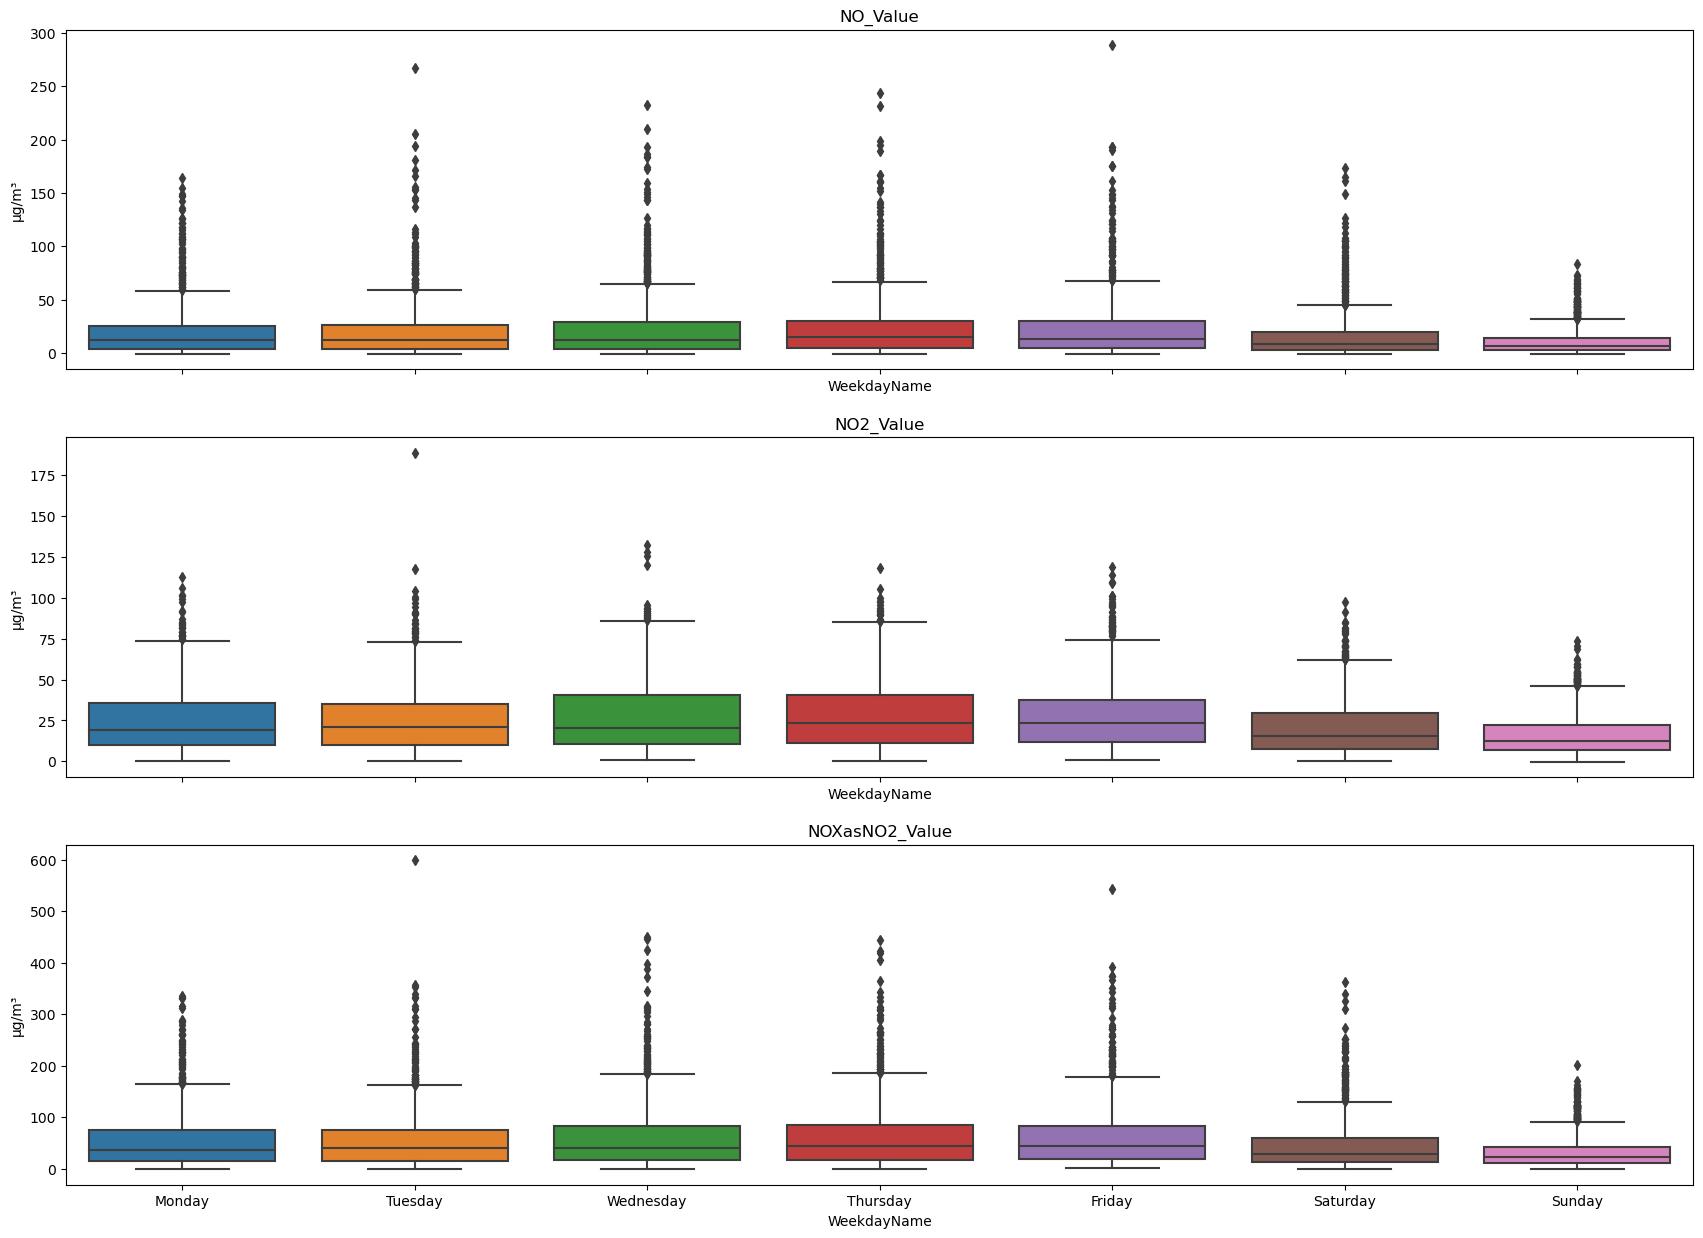

In [16]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, axes = plt.subplots(3, 1, figsize=(21, 15), sharex=True)
for name, ax in zip(['NO_Value', 'NO2_Value', 'NOXasNO2_Value'], axes):
    sns.boxplot(data = df, x = 'WeekdayName', y = name, ax = ax, order=order)
    ax.set_ylabel('µg/m³')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

NO2 levels seem fairly consistent across weekdays, with Saturdays slightly less, and Sundays even lower.

Violin plot https://mode.com/blog/violin-plot-examples/

> Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

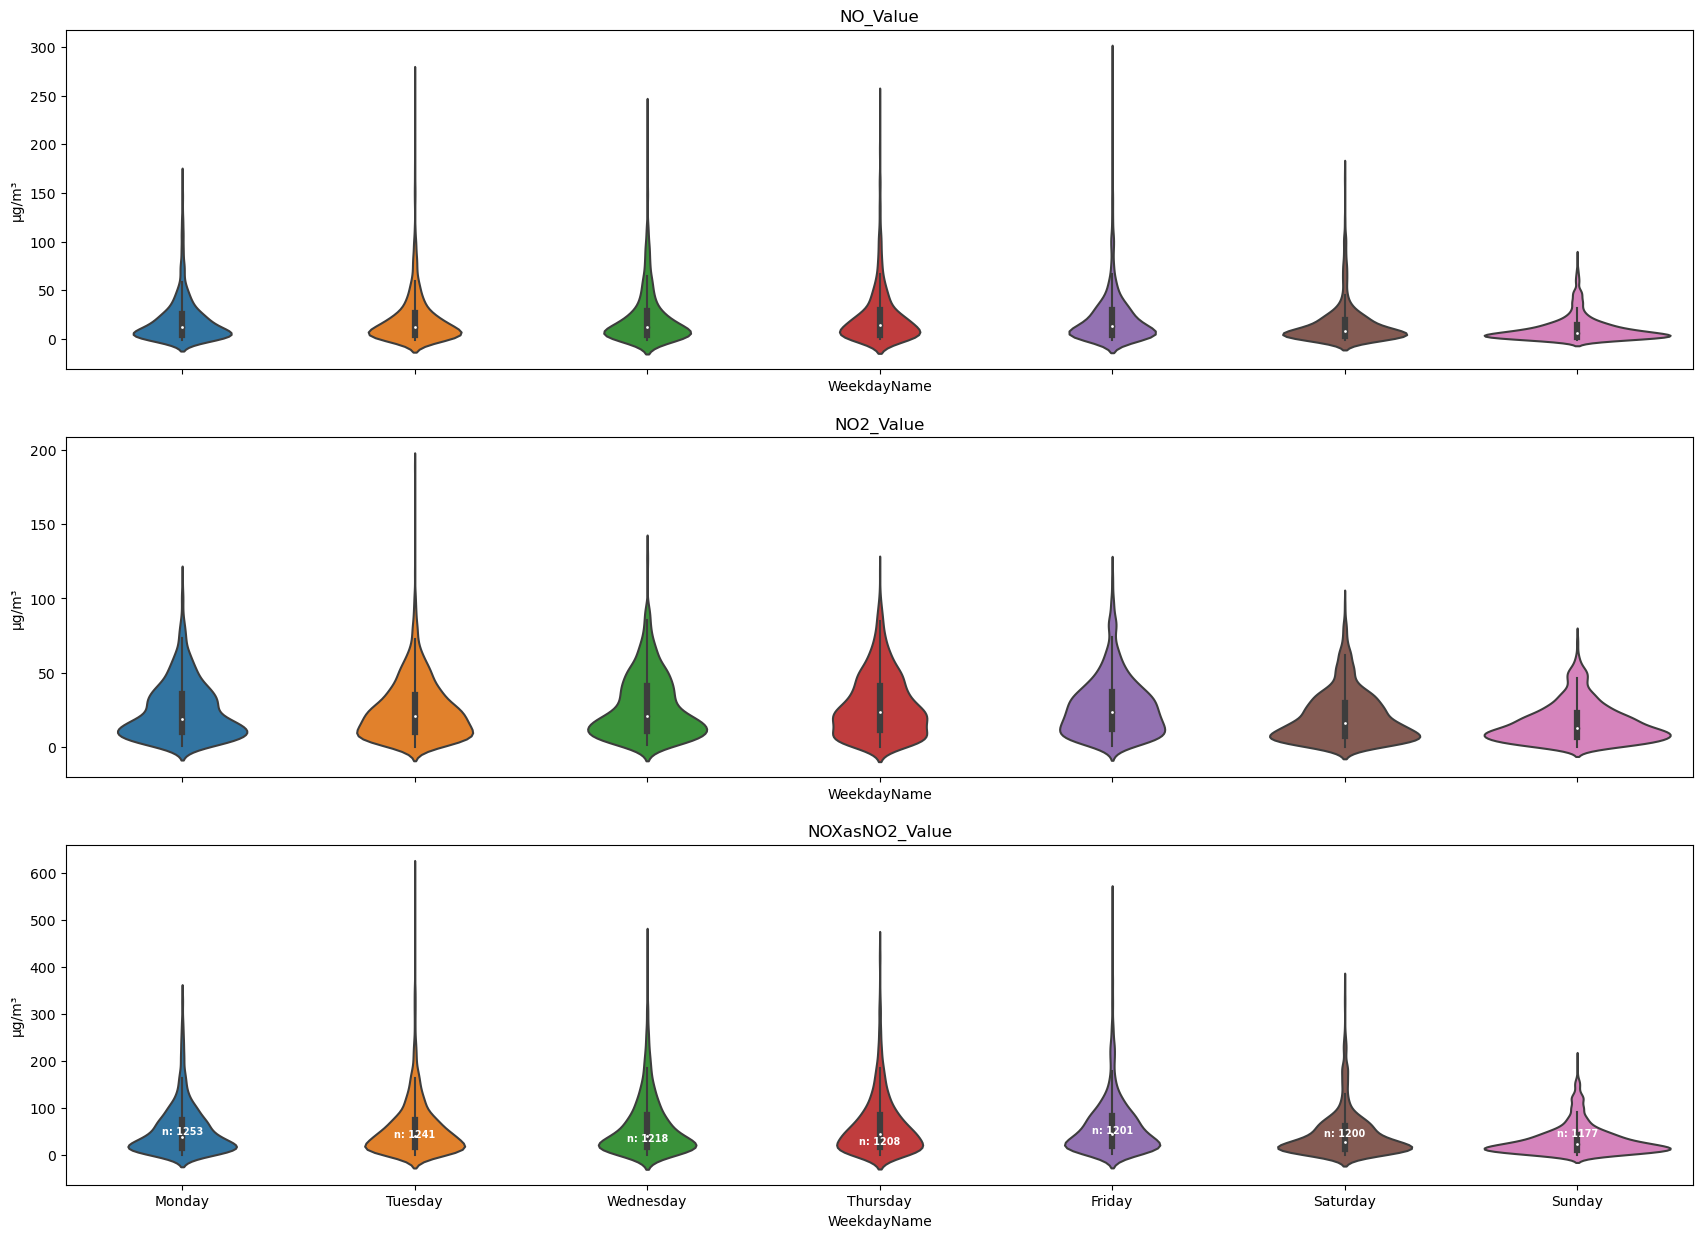

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(21, 15), sharex=True)
for name, ax in zip(['NO_Value', 'NO2_Value', 'NOXasNO2_Value'], axes):
    sns.violinplot(data = df, x = 'WeekdayName', y = name, ax = ax, order=order)
    ax.set_ylabel('µg/m³')
    ax.set_title(name)
    
    # Calculate number of obs per group & median to position labels
    medians = df.groupby(['WeekdayName'])[name].median().values
    nobs = df['WeekdayName'].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    
    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
       ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')


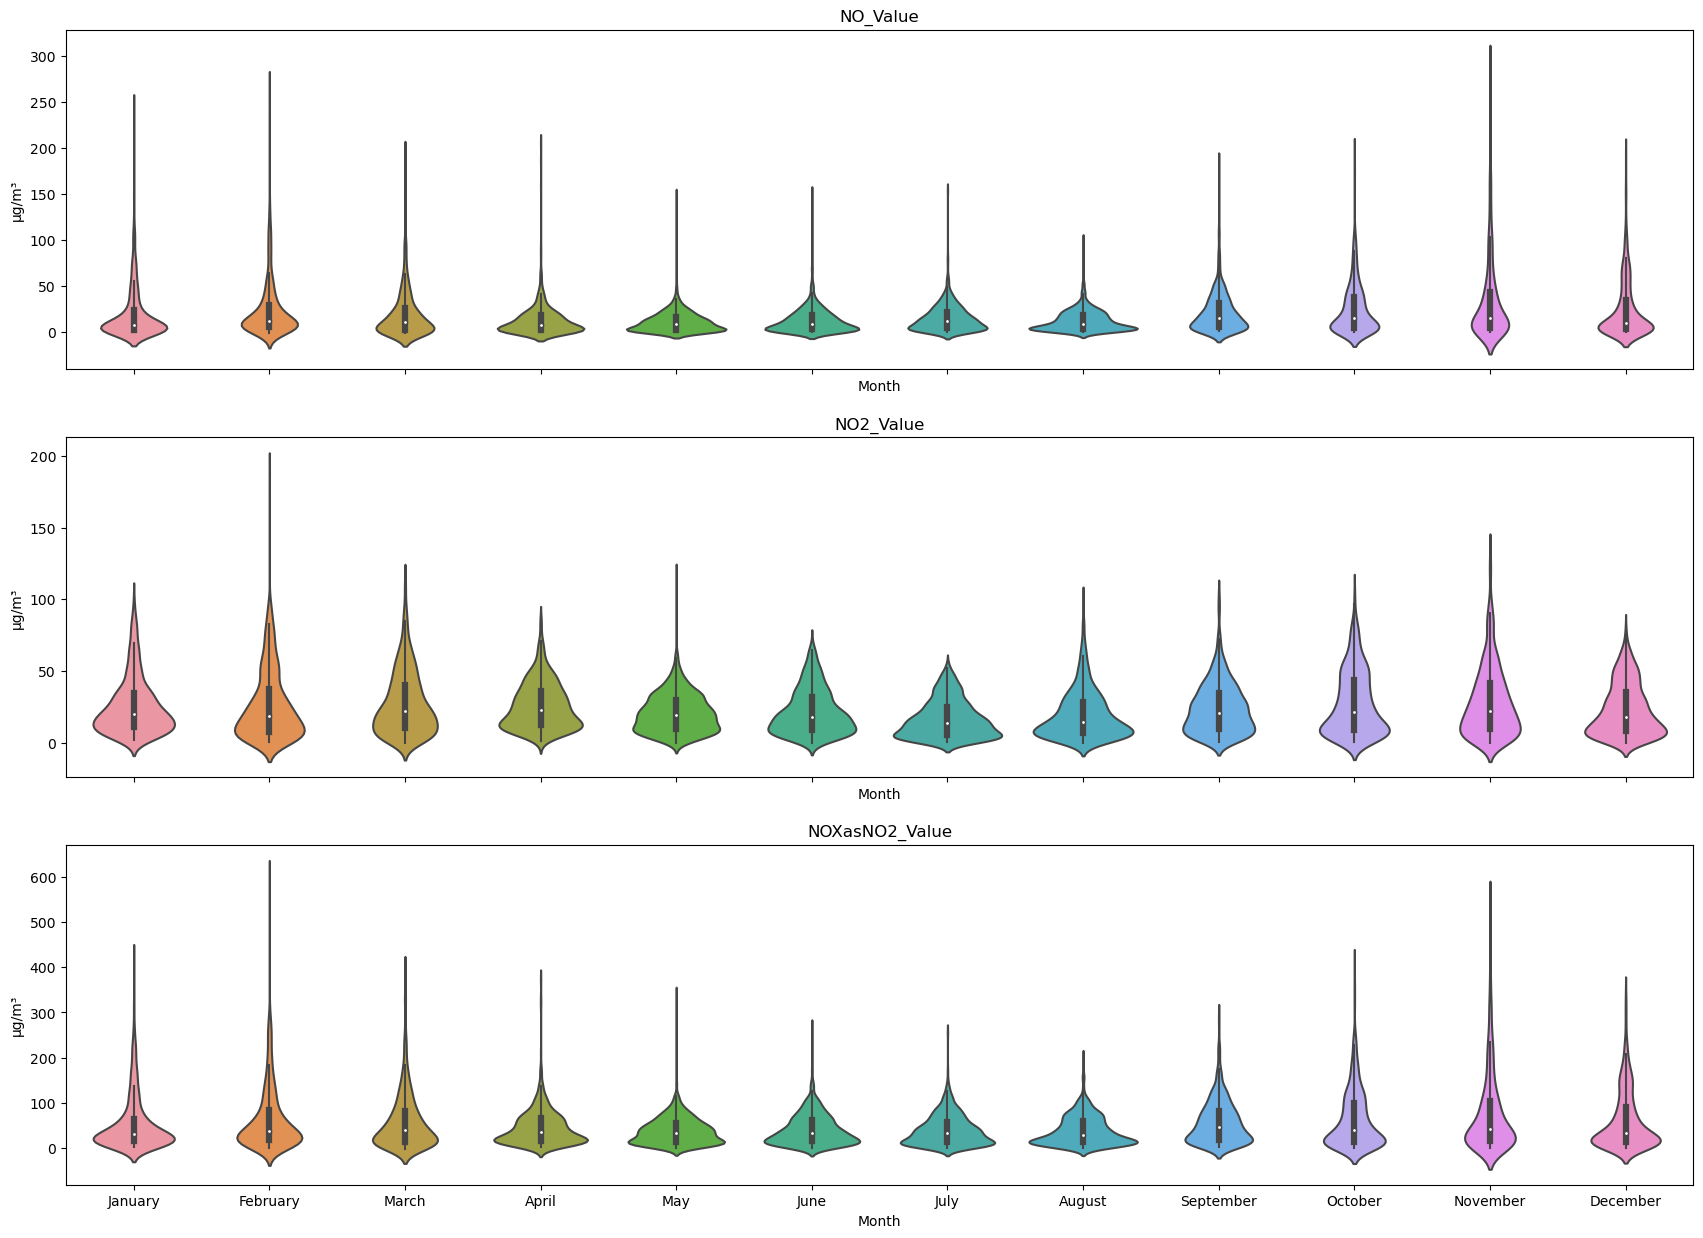

In [18]:
order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

fig, axes = plt.subplots(3, 1, figsize=(21, 15), sharex=True)
for name, ax in zip(['NO_Value', 'NO2_Value', 'NOXasNO2_Value'], axes):
    sns.violinplot(data = df, x = 'Month', y = name, ax = ax, order=order)
    ax.set_ylabel('µg/m³')
    ax.set_title(name)

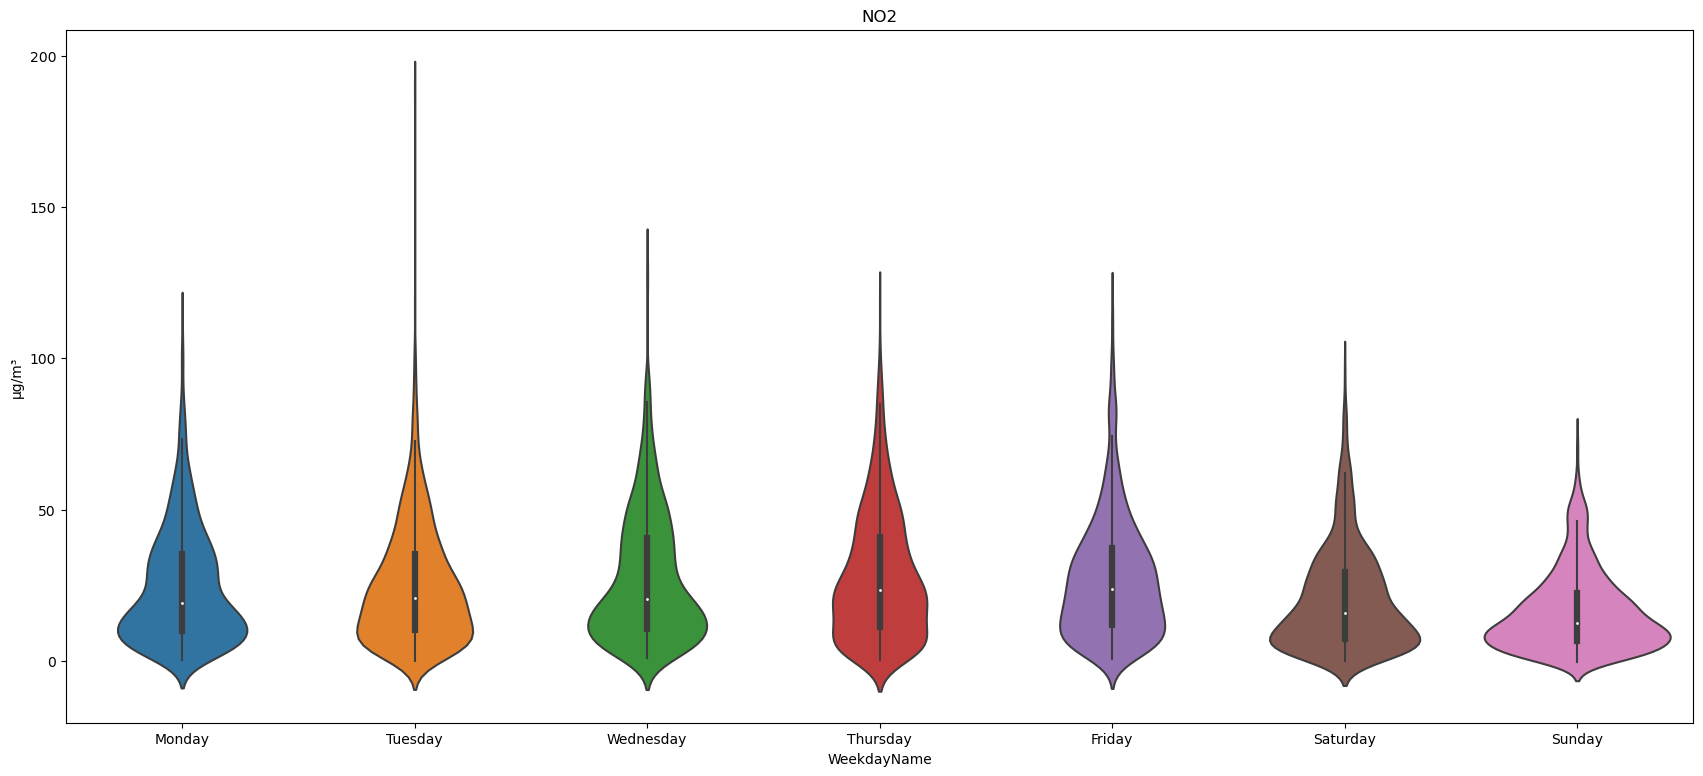

In [19]:
plt.figure(figsize=(21,9))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.violinplot(data = df, x = 'WeekdayName', y = 'NO2_Value', order=order)
ax.set_ylabel('µg/m³')
plt.title('NO2')
plt.show()

In [21]:
# Finding the mean NO2 value by day of the week and hour

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_mean_NO2_grp = df.groupby(["WeekdayName","Time"])['NO2_Value'].mean()

mean_df = df_mean_NO2_grp.unstack(level=0).sort_index(axis=1, level=1)[order]
mean_df

WeekdayName,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
00:00:00,10.461914,11.550566,14.687504,12.975513,17.097331,14.946258,11.962995
01:00:00,8.012494,8.633637,10.514262,9.757190,12.584107,11.616413,9.767161
02:00:00,7.045873,7.506079,8.891719,8.367208,9.850630,9.917453,7.923363
03:00:00,6.842137,6.147020,8.252064,7.485857,9.216937,8.082438,6.837645
04:00:00,6.789572,5.845624,8.303992,7.221703,9.203645,7.118183,6.015230
05:00:00,7.705436,6.846441,8.877394,8.330061,9.595208,7.197408,5.924346
06:00:00,10.128010,11.435195,12.129745,11.109800,12.769668,7.767218,6.353738
07:00:00,17.802337,20.645000,20.955603,17.930408,20.097872,10.099602,7.820693
08:00:00,30.379919,31.537488,34.866835,30.657161,30.140763,14.451907,9.635948


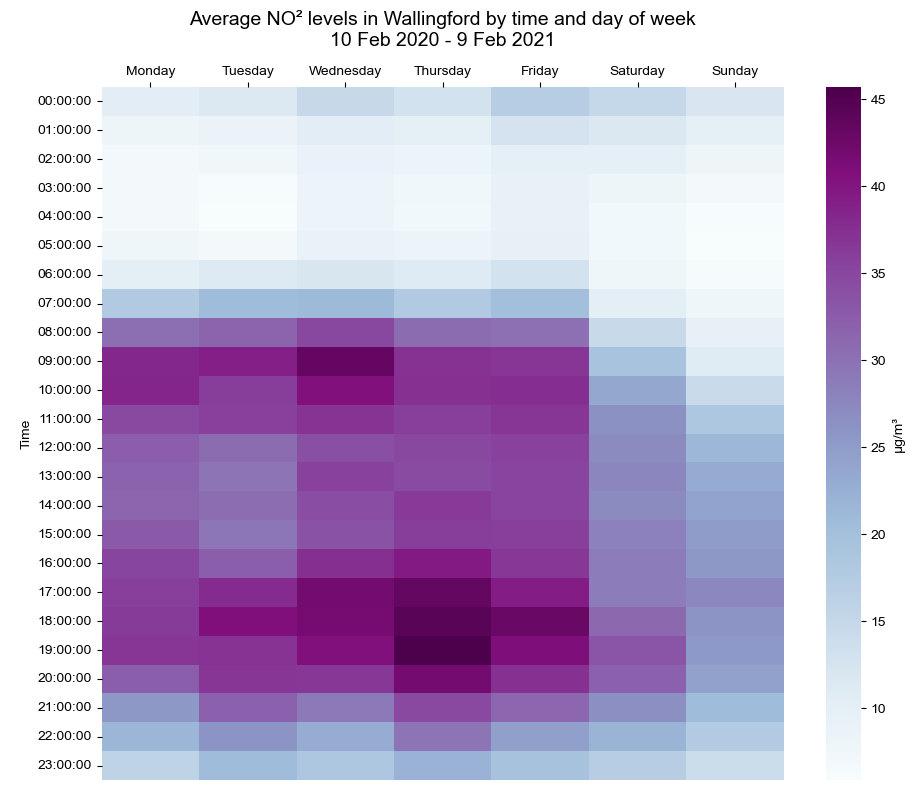

In [22]:
# Plot mean NO2 values on a heatmap

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_df, cmap="BuPu", cbar_kws={'label': 'µg/m³'})
ax.xaxis.tick_top()
plt.xlabel('')
plt.title('Average NO² levels in Wallingford by time and day of week\n10 Feb 2020 - 9 Feb 2021', fontsize = 14, pad = 30)
sns.set_style("darkgrid", {"font.sans-serif": "Arial"})
plt.show()

### Findings from the heatmap

- In one year, the highest average concentration of NO2 was on Thursdays at 7pm.
- Sundays had the lowest average concentrations of NO2
- 1am until 6am had the lowest average concentrations every day